<a href="https://colab.research.google.com/github/michelucci/oreilly-london-ai/blob/master/day1/First_Example_of_a_CNN_(CIFAR10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First example of a CNN

(C) Umberto Michelucci

umberto.michelucci@toelt.ai

www.toelt.ai

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

#from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback

from tensorflow.keras.datasets import cifar10
import numpy as np
from tensorflow.keras import utils

import matplotlib as mpl
mpl.style.use('classic')

import matplotlib.pyplot as plt

In [4]:
utils.set_random_seed(42)

## Model

## The ```CIFAR10``` Dataset

The **CIFAR-10** dataset is a popular computer vision dataset commonly used for training and evaluating machine learning and deep learning models for image classification tasks. CIFAR-10 stands for "Canadian Institute for Advanced Research - 10," indicating that it was created by researchers in Canada. The dataset consists of the following key features:

1. Number of Classes: CIFAR-10 contains 10 different classes or categories, each representing a different type of object or scene. These classes are:

   - Airplane
   - Automobile
   - Bird
   - Cat
   - Deer
   - Dog
   - Frog
   - Horse
   - Ship
   - Truck

2. **Image Size**: Each image in the CIFAR-10 dataset is a color image (RGB) with dimensions of 32 pixels in height and 32 pixels in width. This results in 32x32-pixel images.

3. **Dataset Split**: The CIFAR-10 dataset is typically divided into two subsets: a training set and a test set. The training set contains 50,000 labeled images, with 5,000 images per class, while the test set contains 10,000 labeled images, with 1,000 images per class.

4. **Data Variability**: The images in CIFAR-10 are known for their diversity and complexity. They may contain variations in lighting, orientation, background, and other factors, making them suitable for testing the robustness of machine learning models.

5. **Purpose**: CIFAR-10 is often used as a benchmark dataset for developing and evaluating image classification algorithms and deep neural networks. Researchers and practitioners use it to assess the performance of their models in terms of accuracy and generalization to real-world data.

6. **Difficulty**: While CIFAR-10 is a well-known dataset, it is considered moderately challenging due to the small image size and the diversity of objects and scenes. Achieving high accuracy on CIFAR-10 is a common milestone in the development of image classification models.

Researchers and machine learning practitioners use CIFAR-10 to develop and test various computer vision algorithms, including convolutional neural networks (CNNs) and other deep learning architectures. The dataset's popularity stems from its size, diversity, and the fact that it provides a good starting point for experimenting with image classification tasks before moving on to larger and more complex datasets like CIFAR-100 or ImageNet.

In [19]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [20]:
y_test.shape

(10000, 1)

## Data Normalisation

In [22]:
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7) # ATTENTION: Example of data leakage!

# CORRECT VERSION
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)

mean = np.mean(x_test,axis=(0,1,2,3))
std = np.std(x_test,axis=(0,1,2,3))
x_est = (x_test-mean)/(std+1e-7)

## One-hot encoding Labels

In [23]:
nClasses = 10
y_train = utils.to_categorical(y_train,nClasses)
y_test = utils.to_categorical(y_test,nClasses)

In [24]:
y_test.shape

(10000, 10)

In [25]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [26]:
K.clear_session()
model = createModel()

In [27]:
AdamOpt = Adam(learning_rate=0.001)
model.compile(optimizer=AdamOpt, loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


In [29]:
print(x_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 10)


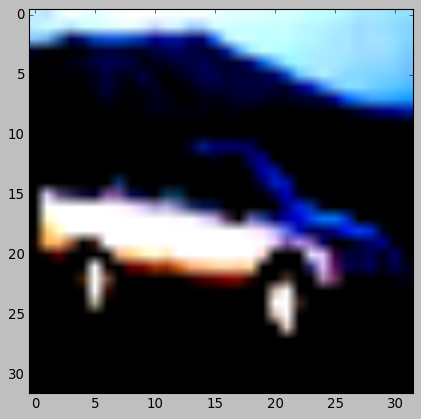

In [30]:
plt.imshow(x_train[4])

In [31]:
y_test.shape

(10000, 10)

Now we just need to train the model with the ```fit()``` method.

In [32]:
batch_size = 256
epochs = 10

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(x_test, y_test))

Epoch 1/10
196/196 [==============================] - 23s 115ms/step - loss: 1.7802 - accuracy: 0.3317 - val_loss: 1.4237 - val_accuracy: 0.4867
Epoch 2/10
196/196 [==============================] - 22s 113ms/step - loss: 1.3534 - accuracy: 0.5061 - val_loss: 1.1604 - val_accuracy: 0.5824
Epoch 3/10
196/196 [==============================] - 22s 112ms/step - loss: 1.1575 - accuracy: 0.5813 - val_loss: 1.0633 - val_accuracy: 0.6269
Epoch 4/10
196/196 [==============================] - 22s 113ms/step - loss: 1.0493 - accuracy: 0.6266 - val_loss: 0.9650 - val_accuracy: 0.6595
Epoch 5/10
196/196 [==============================] - 22s 114ms/step - loss: 0.9509 - accuracy: 0.6638 - val_loss: 0.8570 - val_accuracy: 0.6957
Epoch 6/10
196/196 [==============================] - 23s 116ms/step - loss: 0.8792 - accuracy: 0.6912 - val_loss: 0.7942 - val_accuracy: 0.7245
Epoch 7/10
196/196 [==============================] - 23s 118ms/step - loss: 0.8224 - accuracy: 0.7096 - val_loss: 0.7680 - val_ac

The ```history``` dictionary contains all the information about the training. So we can use it to visualise and check how things went.

In [33]:
history.history

{'loss': [1.7801915407180786,
  1.353427767753601,
  1.157487154006958,
  1.0492866039276123,
  0.9509307146072388,
  0.8791736960411072,
  0.8223742246627808,
  0.7840245366096497,
  0.7520684599876404,
  0.7217845320701599],
 'accuracy': [0.3316600024700165,
  0.5060999989509583,
  0.5813199877738953,
  0.626579999923706,
  0.6637600064277649,
  0.6912199854850769,
  0.7095999717712402,
  0.7242799997329712,
  0.7356799840927124,
  0.7482200264930725],
 'val_loss': [1.4237338304519653,
  1.1604114770889282,
  1.063256025314331,
  0.9650456309318542,
  0.8569583892822266,
  0.7942089438438416,
  0.7680057883262634,
  0.7335484623908997,
  0.7298790812492371,
  0.6983219981193542],
 'val_accuracy': [0.48669999837875366,
  0.5824000239372253,
  0.6269000172615051,
  0.659500002861023,
  0.6956999897956848,
  0.7245000004768372,
  0.7355999946594238,
  0.7483000159263611,
  0.748199999332428,
  0.7599999904632568]}

Text(0, 0.5, 'Loss')

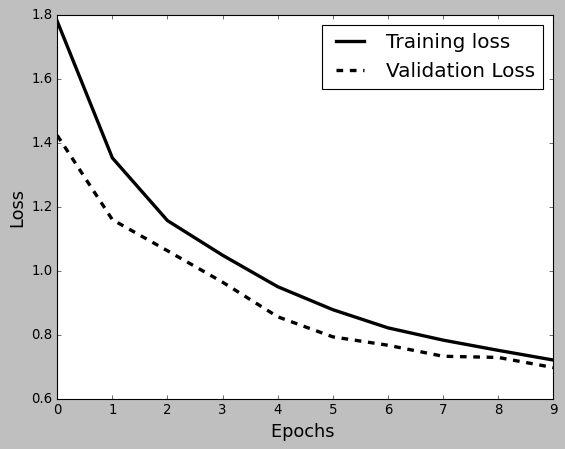

In [34]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'black',linewidth=3.0)
plt.plot(history.history['val_loss'],'black',ls = '--', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
#plt.title('Loss Curves',fontsize=16)


Text(0, 0.5, 'Accuracy')

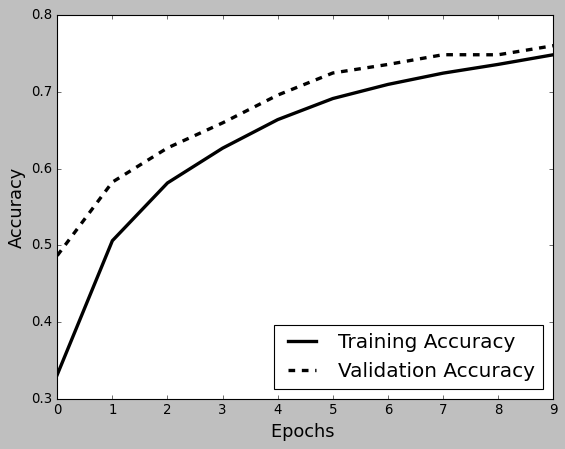

In [35]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'black',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'black',ls = '--',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18, 
           loc = 'lower right')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
#plt.title('Accuracy Curves',fontsize=16)
